<a href="https://colab.research.google.com/github/bezisch/Climate_Obstruction/blob/main/networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script aims at conducting a network analysis from the fossil fuel NER

For this to run, we have to upload the "Database_for_Publication_042425_withdates.xlsx" file

In [18]:
pip install pyvis

KeyboardInterrupt: 

In [ ]:
import pandas as pd
#network analysis
import networkx as nx
from itertools import combinations
#visualise network
import matplotlib.pyplot as plt
from collections import defaultdict
from pyvis.network import Network
import webbrowser

### Network Analysis

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
docs = pd.read_excel("Database_for_Publication_042425_withdates.xlsx")

# Function to read text from a file
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        return f"Error: {e}"

docs.shape #should be 4479 rows

In [ ]:
docs.info(1)

Filter variables.



In [ ]:
filtered_docs = docs[docs['Keyword Climate Environment'].notna()]
filtered_docs = filtered_docs.reset_index()


actor_columns = [
    'People',
    'Academia',
    'Consultancy',
    'Courts',
    'Energy Industry',
    'Government Agency',
    'International Climate Governance',
    'International Organization',
    'Journalist',
    'Legal Professionals',
    'Legislation',
    'Litigation',
    'Lobby',
    'NGO/Thinktank/Foundation',
    'News Outlet',
    'Other Industry',
    'PR Company',
    'Politician',
    'Judiciary',
    'Media'
]


# Create a new dataframe of booleans: actor is present if value is non-null and not just whitespace
actor_presence = filtered_docs[actor_columns].applymap(lambda x: isinstance(x, str) and x.strip() != '')


print(actor_presence.sum().sort_values(ascending=False))  # how many documents each actor appears in

In [ ]:
#We want documents that mention at least 2 actor types (columns with True):

actor_presence['actor_count'] = actor_presence.sum(axis=1)
filtered_presence = actor_presence[actor_presence['actor_count'] >= 2]


# Build the Co-occurrence Network

G_overall = nx.Graph()

for idx, row in filtered_presence.iterrows():
    present_actors = [actor for actor in actor_columns if row[actor]]
    for actor1, actor2 in combinations(present_actors, 2):
        if G_overall.has_edge(actor1, actor2):
            G_overall[actor1][actor2]['weight'] += 1
        else:
            G_overall.add_edge(actor1, actor2, weight=1)


#Visualise the network

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_overall, seed=42)
edges = G_overall.edges(data=True)

# Normalize edge widths
max_weight = max([d['weight'] for (_, _, d) in edges])
scaled_widths = [d['weight'] / max_weight * 10 for (_, _, d) in edges]

nx.draw_networkx_nodes(G_overall, pos, node_size=1200, node_color='lightgreen')
nx.draw_networkx_labels(G_overall, pos, font_size=9)
nx.draw_networkx_edges(G_overall, pos, edgelist=edges, width=scaled_widths)

# Optional edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G_overall, pos, edge_labels=edge_labels, font_size=7)

plt.title("Normalized Actor Co-occurrence Network")
plt.axis('off')
plt.show()

Element	Interpretation

Big node in center	Frequently co-occurs with many others

Thick edge	Strong connection (many co-occurrences)

Isolated/small node	Rarely co-occurs with others

Edge label = 35	Appeared together in 35 documents

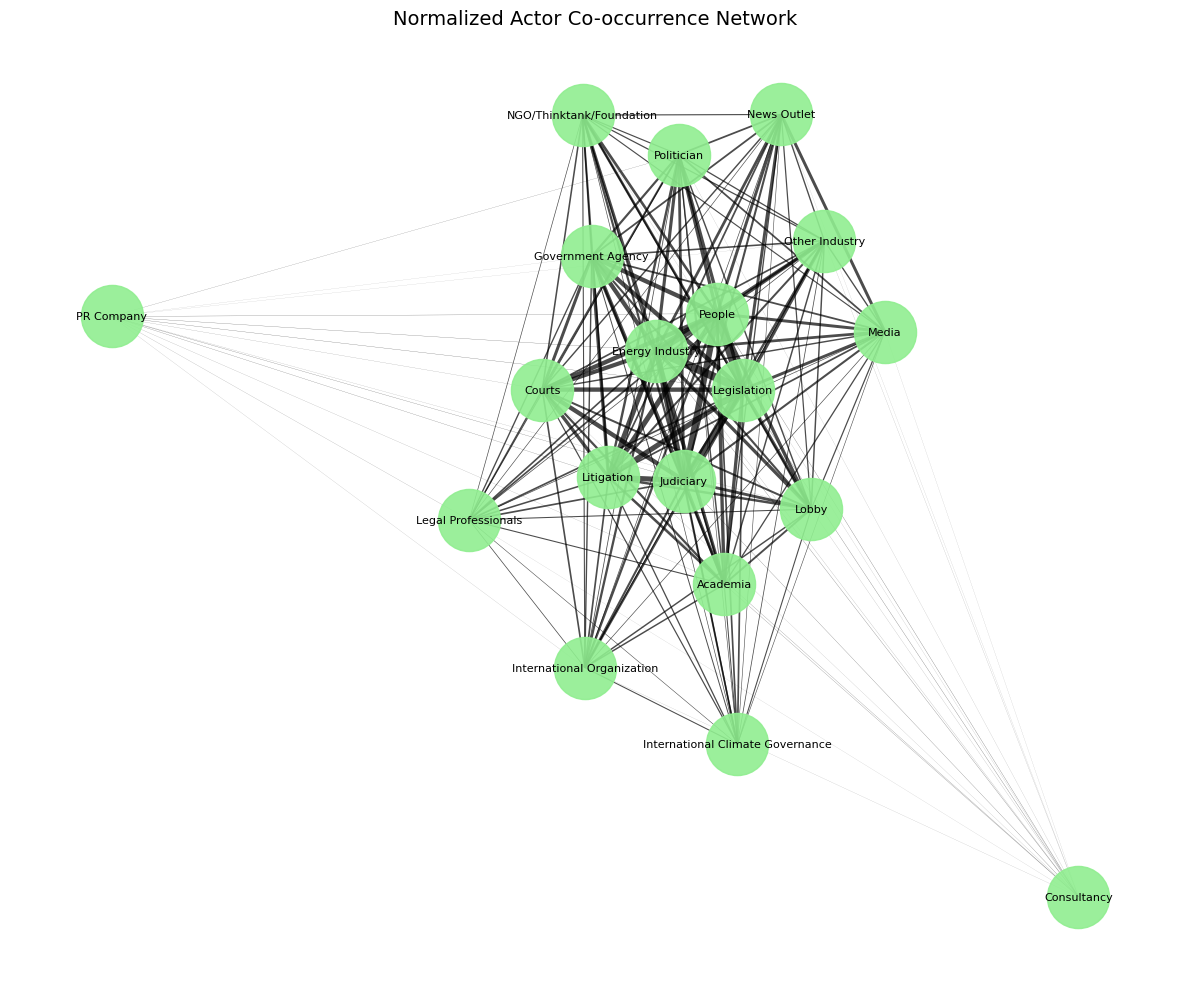

In [19]:
#new lotti
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Build the Co-occurrence Network
G_overall = nx.Graph()

for idx, row in filtered_presence.iterrows():
    present_actors = [actor for actor in actor_columns if row[actor]]
    for actor1, actor2 in combinations(present_actors, 2):
        if G_overall.has_edge(actor1, actor2):
            G_overall[actor1][actor2]['weight'] += 1
        else:
            G_overall.add_edge(actor1, actor2, weight=1)

# Remove edges with weight < 10
edges_to_remove = [(u, v) for u, v, d in G_overall.edges(data=True) if d['weight'] < 10]
G_overall.remove_edges_from(edges_to_remove)

# Remove isolated nodes
isolated_nodes = list(nx.isolates(G_overall))
G_overall.remove_nodes_from(isolated_nodes)

# Visualise the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_overall, seed=42, k=0.4)

edges = G_overall.edges(data=True)
max_weight = max([d['weight'] for (_, _, d) in edges]) if edges else 1
scaled_widths = [d['weight'] / max_weight * 6 for (_, _, d) in edges]

nx.draw_networkx_nodes(G_overall, pos, node_size=2000, node_color='lightgreen', alpha=0.9)
nx.draw_networkx_labels(G_overall, pos, font_size=8)
nx.draw_networkx_edges(G_overall, pos, edgelist=edges, width=scaled_widths, alpha=0.7)

plt.title("Normalized Actor Co-occurrence Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()



Building network for keyword: biofuels
No documents found for keyword: biofuels

Building network for keyword: ccs


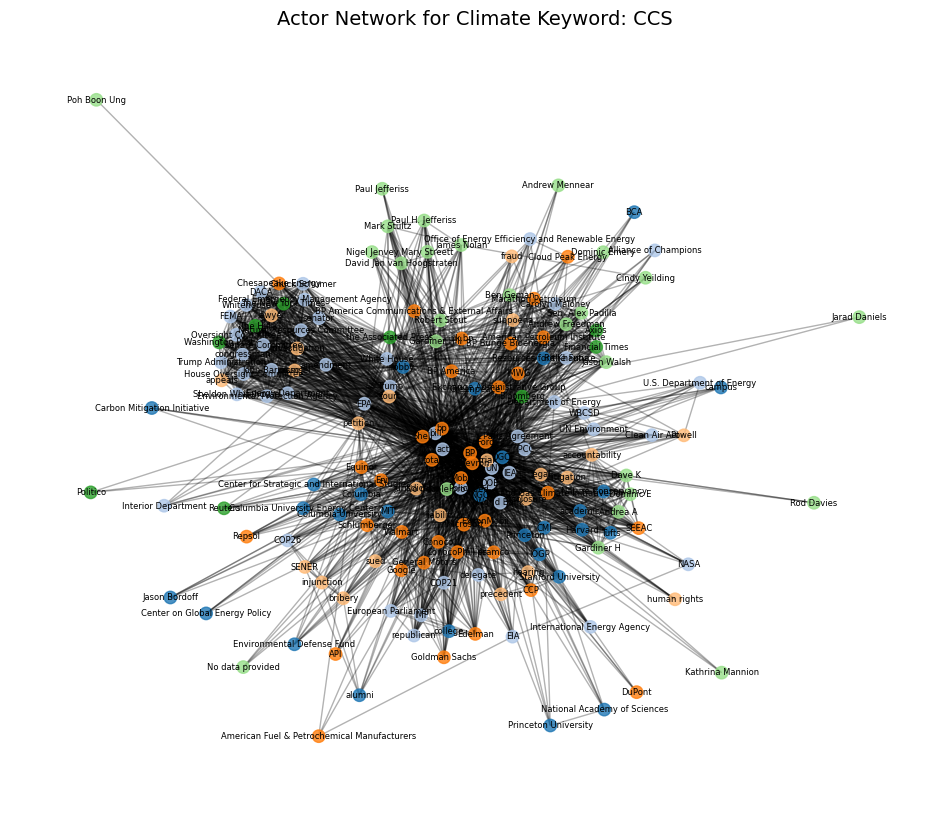


Building network for keyword: nuclear


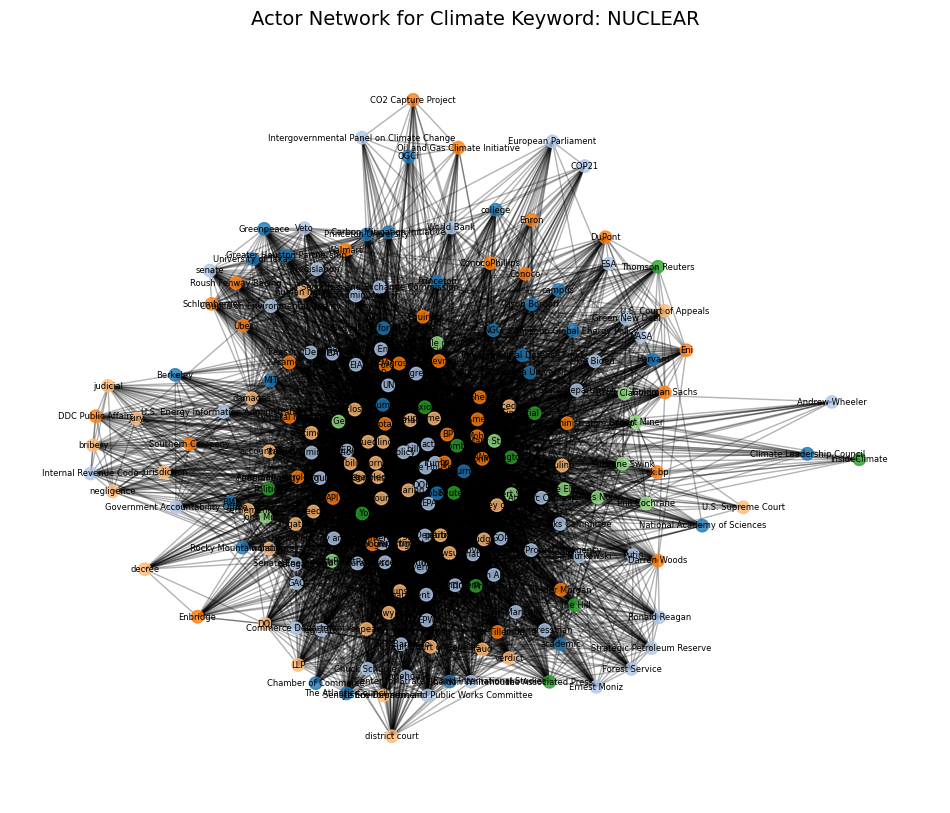


Building network for keyword: ccus


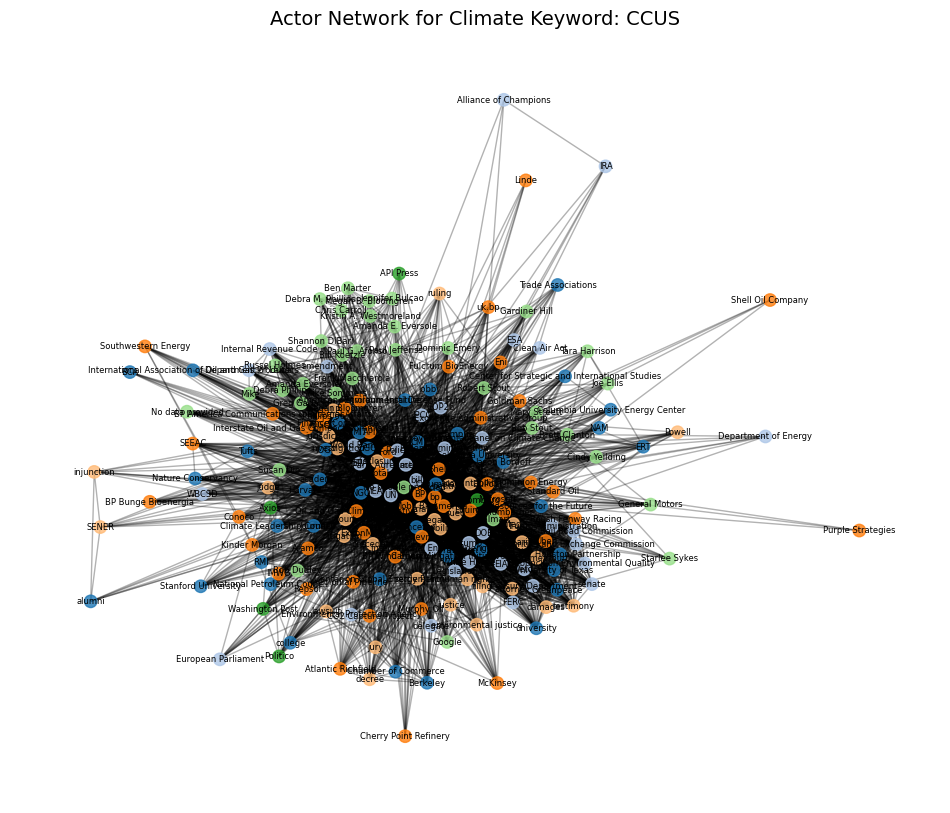


Building network for keyword: algae


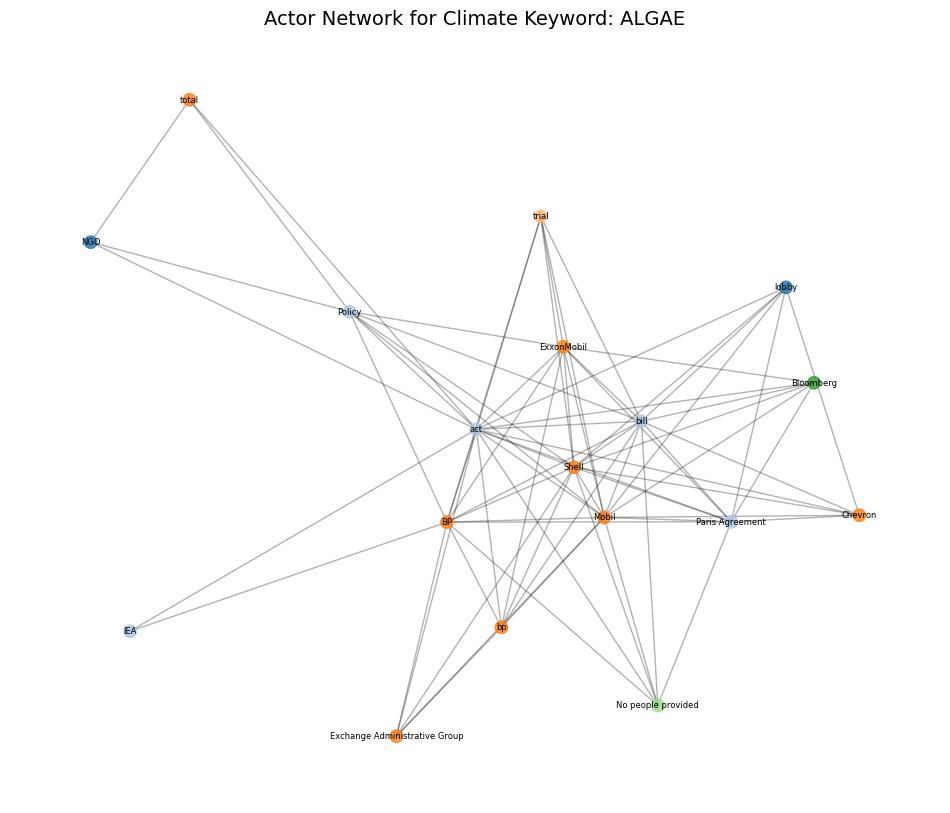


Building network for keyword: hydrogen


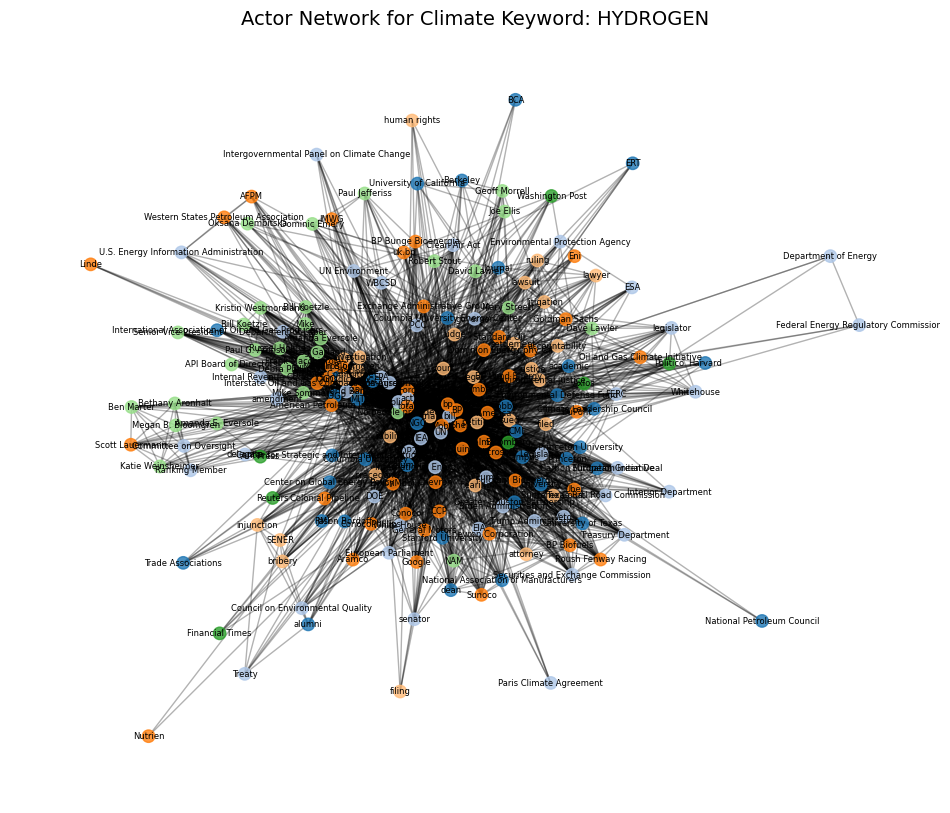

In [20]:
# Keywords to include
target_keywords = {'nuclear', 'ccus', 'ccs', 'biofuels', 'algae', 'hydrogen'}

# Clean and split keyword list
filtered_docs['Climate_Keywords'] = filtered_docs['Climate_Keywords'].fillna('')
filtered_docs['Climate_Keyword_List'] = filtered_docs['Climate_Keywords'].apply(
    lambda x: [kw.strip().lower() for kw in x.split(';') if kw.strip()]
)

# Filter to docs that include any of the target keywords
keyword_docs = filtered_docs[
    filtered_docs['Climate_Keyword_List'].apply(lambda kws: any(k in target_keywords for k in kws))
].copy()

# Define actor columns and their delimiters
actor_columns = [
    'People', 'Academia', 'Consultancy', 'Courts', 'Energy Industry', 'Government Agency',
    'International Climate Governance', 'International Organization', 'Journalist',
    'Legal Professionals', 'Legislation', 'Litigation', 'Lobby',
    'NGO/Thinktank/Foundation', 'News Outlet', 'Other Industry', 'PR Company',
    'Politician', 'Advocacy_Research', 'Government_Policy', 'Industry_Business',
    'Judiciary', 'Media'
]
delimiters = {
    'People': ',',
    **{col: ';' for col in actor_columns if col != 'People'}
}

# Loop through each keyword
for keyword in target_keywords:
    print(f"\nBuilding network for keyword: {keyword}")

    # Subset for this keyword
    docs = keyword_docs[keyword_docs['Climate_Keyword_List'].apply(lambda kws: keyword in kws)].copy()
    if docs.empty:
        print(f"No documents found for keyword: {keyword}")
        continue

    # Step 1: Extract all actors with categories
    entity_records = []
    for idx, row in docs.iterrows():
        for col in actor_columns:
            raw_val = row.get(col)
            if pd.isna(raw_val):
                continue
            delimiter = delimiters[col]
            entities = [e.strip() for e in raw_val.split(delimiter) if e.strip() and e.strip().lower() != ['not specified','no data provided']]
            for entity in entities:
                entity_records.append({
                    'doc_id': idx,
                    'entity': entity,
                    'category': col
                })

    entity_df = pd.DataFrame(entity_records)

    # Step 2: Keep only top 200 actors
    top_entities = entity_df['entity'].value_counts().nlargest(200).index
    entity_df = entity_df[entity_df['entity'].isin(top_entities)]

    # Step 3: Build edges (only if actors co-occurred at least 2 times)
    edge_weights = defaultdict(int)
    for _, group in entity_df.groupby('doc_id'):
        entities = list(group['entity'].unique())
        for e1, e2 in combinations(sorted(entities), 2):
            edge_weights[(e1, e2)] += 1

    edge_weights = {pair: w for pair, w in edge_weights.items() if w >= 2}
    if not edge_weights:
        print(f"No strong edges for keyword: {keyword}")
        continue

    # Step 4: Create graph
    G = nx.Graph()
    for (e1, e2), weight in edge_weights.items():
        G.add_edge(e1, e2, weight=weight)

    entity_category_map = dict(zip(entity_df['entity'], entity_df['category']))
    node_colors = []
    category_colors = {}
    palette = plt.cm.tab20.colors
    for i, cat in enumerate(sorted(set(entity_category_map.values()))):
        category_colors[cat] = palette[i % len(palette)]

    for node in G.nodes():
        cat = entity_category_map.get(node, 'Other')
        G.nodes[node]['category'] = cat
        node_colors.append(category_colors.get(cat, 'gray'))

    # Step 5: Plot it
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=6)
    plt.title(f"Actor Network for Climate Keyword: {keyword.upper()}", fontsize=14)
    plt.axis('off')
    plt.show()


Building network for keyword: biofuels
No documents found for keyword: biofuels

Building network for keyword: ccs


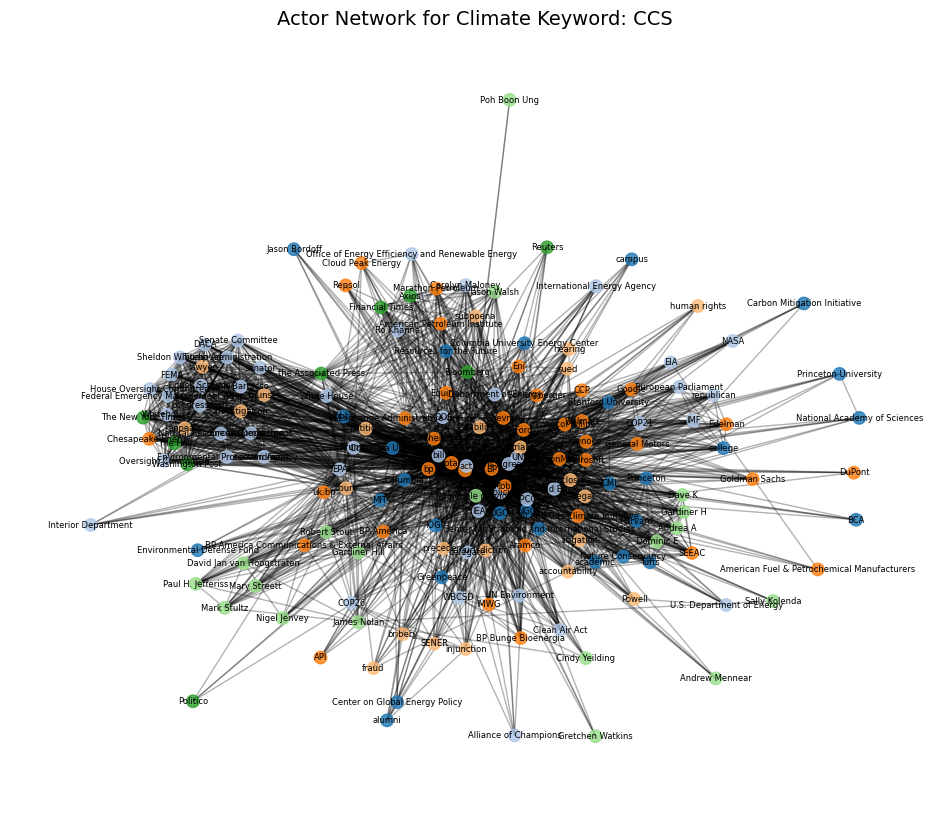


Building network for keyword: nuclear


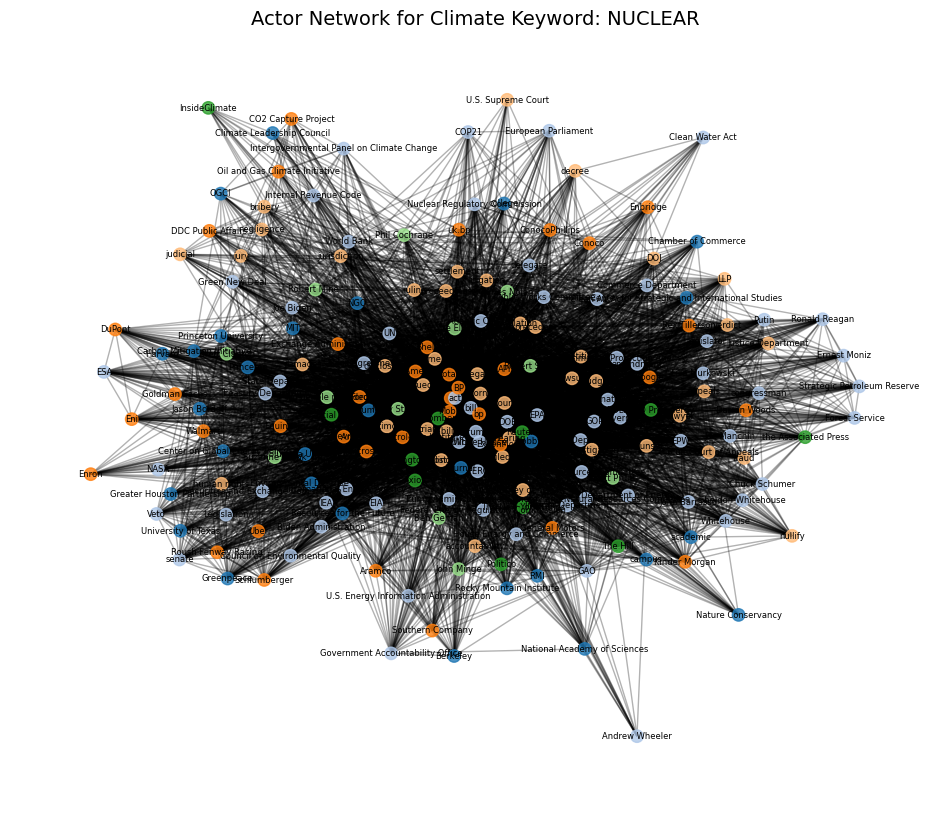


Building network for keyword: ccus


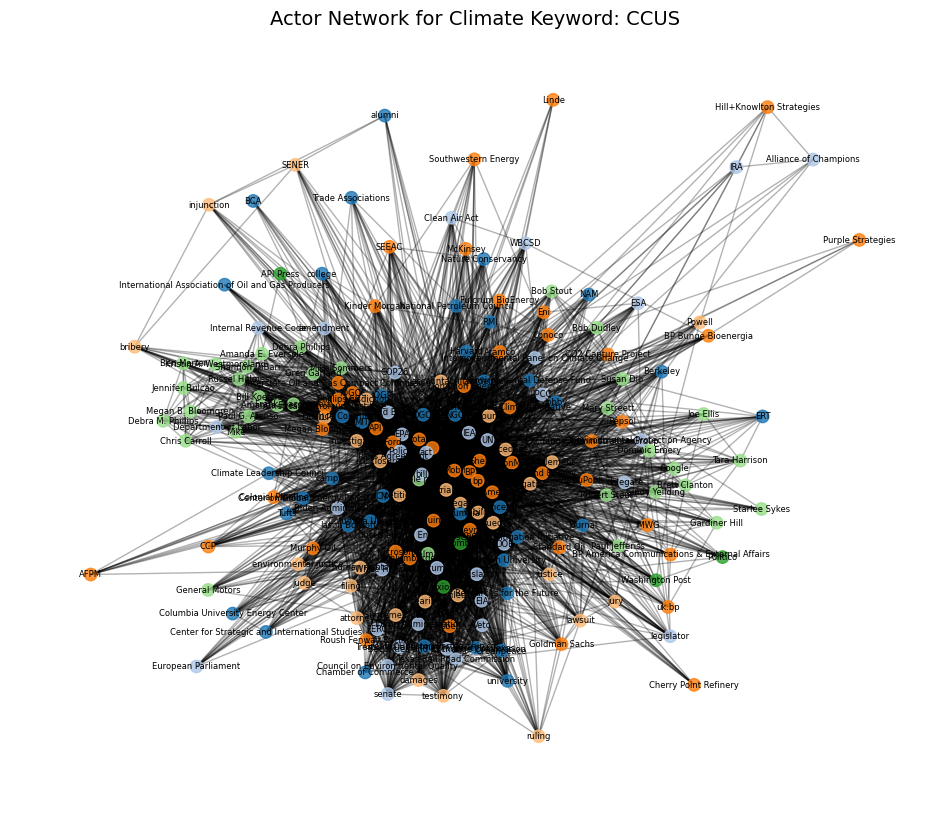


Building network for keyword: algae


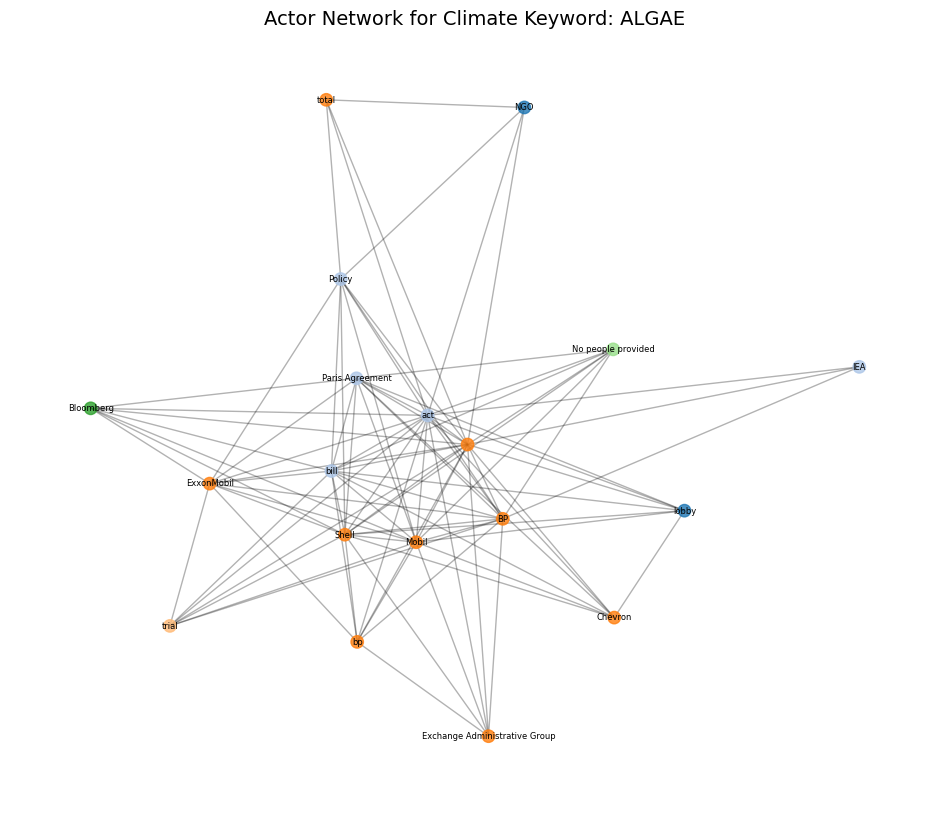


Building network for keyword: hydrogen


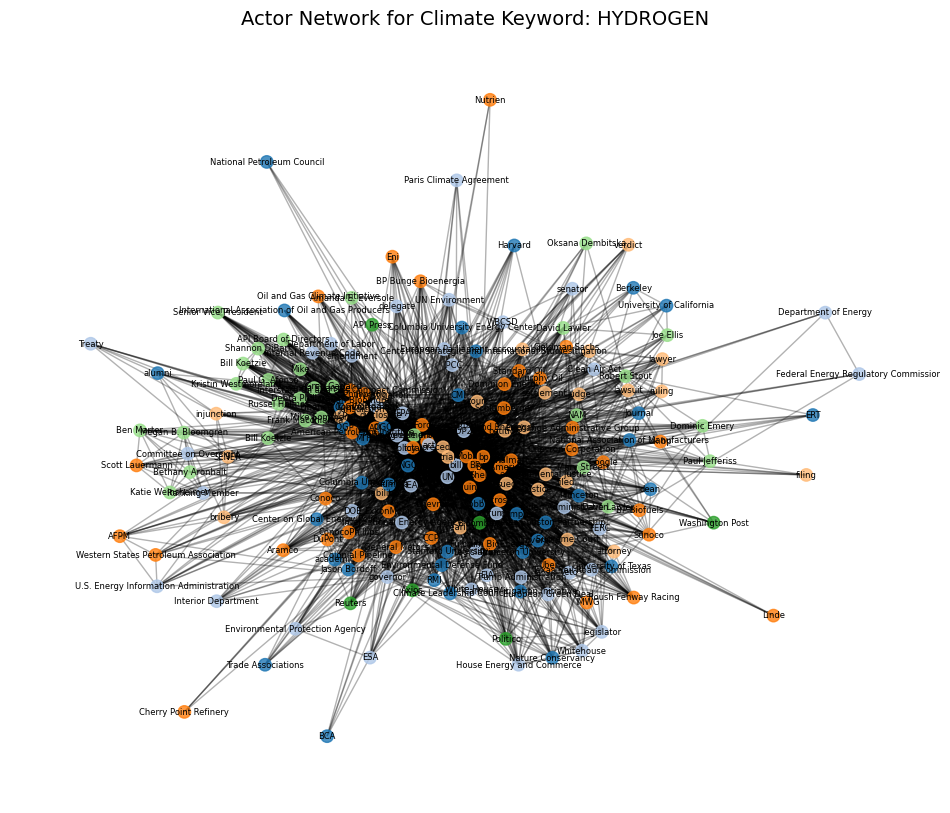

In [21]:
from collections import defaultdict
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loop through each keyword
for keyword in target_keywords:
    print(f"\nBuilding network for keyword: {keyword}")

    docs = keyword_docs[keyword_docs['Climate_Keyword_List'].apply(lambda kws: keyword in kws)].copy()
    if docs.empty:
        print(f"No documents found for keyword: {keyword}")
        continue

    # Step 1: Extract all actors with categories
    entity_records = []
    for idx, row in docs.iterrows():
        for col in actor_columns:
            raw_val = row.get(col)
            if pd.isna(raw_val):
                continue
            delimiter = delimiters[col]
            entities = [e.strip() for e in raw_val.split(delimiter) if e.strip().lower() not in ['not specified', 'no data provided']]
            for entity in entities:
                entity_records.append({
                    'doc_id': idx,
                    'entity': entity,
                    'category': col
                })

    entity_df = pd.DataFrame(entity_records)

    # Step 2: Keep only top 200 actors
    top_entities = entity_df['entity'].value_counts().nlargest(200).index
    entity_df = entity_df[entity_df['entity'].isin(top_entities)]

    # Step 3: Build edges
    edge_weights = defaultdict(int)
    for _, group in entity_df.groupby('doc_id'):
        entities = list(group['entity'].unique())
        for e1, e2 in combinations(sorted(entities), 2):
            edge_weights[(e1, e2)] += 1

    # Remove weakest 10% of edges
    if not edge_weights:
        print(f"No edges for keyword: {keyword}")
        continue

    weights = np.array(list(edge_weights.values()))
    threshold = np.percentile(weights, 10)  # 10th percentile
    edge_weights = {pair: w for pair, w in edge_weights.items() if w > threshold}

    if not edge_weights:
        print(f"No strong edges for keyword: {keyword} after filtering.")
        continue

    # Step 4: Create graph
    G = nx.Graph()
    for (e1, e2), weight in edge_weights.items():
        G.add_edge(e1, e2, weight=weight)

    entity_category_map = dict(zip(entity_df['entity'], entity_df['category']))
    node_colors = []
    category_colors = {}
    palette = plt.cm.tab20.colors
    for i, cat in enumerate(sorted(set(entity_category_map.values()))):
        category_colors[cat] = palette[i % len(palette)]

    for node in G.nodes():
        cat = entity_category_map.get(node, 'Other')
        G.nodes[node]['category'] = cat
        node_colors.append(category_colors.get(cat, 'gray'))

    # Step 5: Plot it
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=6)
    plt.title(f"Actor Network for Climate Keyword: {keyword.upper()}", fontsize=14)
    plt.axis('off')
    plt.show()


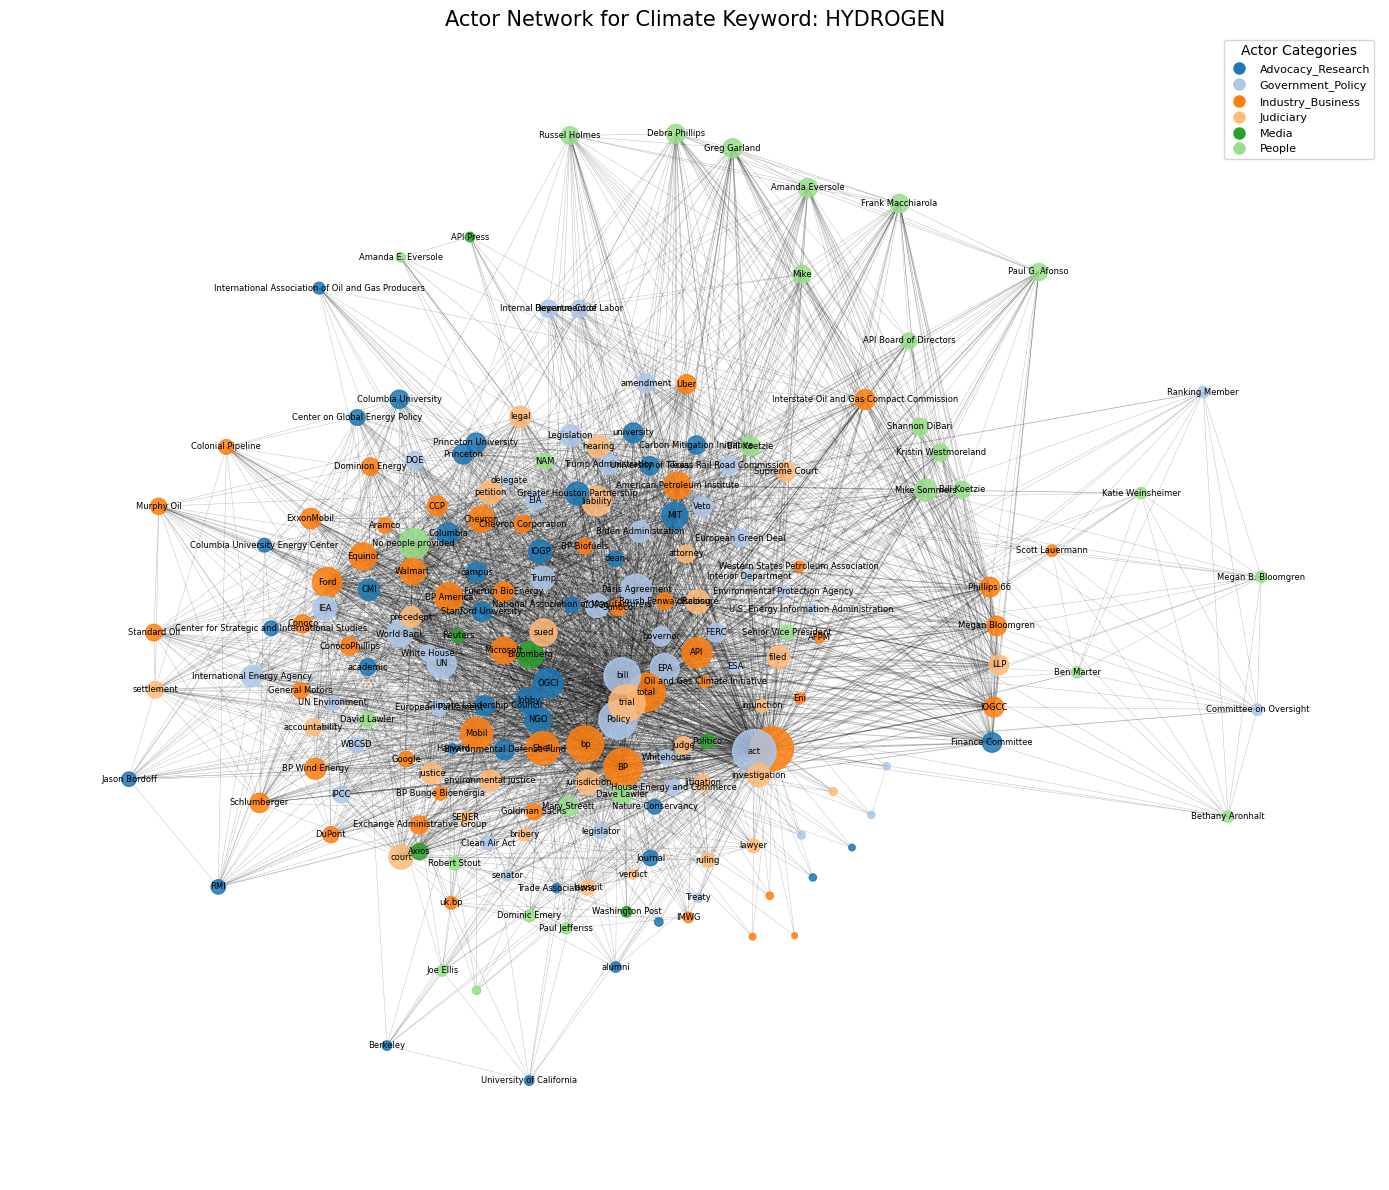

In [22]:
from matplotlib.lines import Line2D

# Layout: better spacing for dense graphs
pos = nx.kamada_kawai_layout(G)

# Calculate node degrees
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# Node size by degree
node_sizes = [2 + 5 * degree_dict[n] for n in G.nodes()]

# Draw only labels for high-degree nodes
label_threshold = 8
labels = {n: n for n in G.nodes() if degree_dict[n] >= label_threshold}

# Draw nodes
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.85)

# Draw edges
edge_widths = [0.3 + 1.5 * G[u][v]['weight'] / max([d['weight'] for (_, _, d) in G.edges(data=True)]) for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.25, width=edge_widths)

# Draw selective labels
nx.draw_networkx_labels(G, pos, labels, font_size=6)

# Build a legend for actor categories
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=10)
    for cat, color in category_colors.items()
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=8, title='Actor Categories')

plt.title(f"Actor Network for Climate Keyword: {keyword.upper()}", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Keywords to include
target_keywords = {'nuclear', 'ccus', 'ccs', 'biofuels', 'algae', 'hydrogen'}

# Clean and split keyword list
filtered_docs['Climate_Keywords'] = filtered_docs['Climate_Keywords'].fillna('')
filtered_docs['Climate_Keyword_List'] = filtered_docs['Climate_Keywords'].apply(
    lambda x: [kw.strip().lower() for kw in x.split(';') if kw.strip()]
)

# Filter to docs that include any of the target keywords
keyword_docs = filtered_docs[
    filtered_docs['Climate_Keyword_List'].apply(lambda kws: any(k in target_keywords for k in kws))
].copy()

# Define actor columns and their delimiters
actor_columns = [
    'People', 'Academia', 'Consultancy', 'Courts', 'Energy Industry', 'Government Agency',
    'International Climate Governance', 'International Organization', 'Journalist',
    'Legal Professionals', 'Legislation', 'Litigation', 'Lobby',
    'NGO/Thinktank/Foundation', 'News Outlet', 'Other Industry', 'PR Company',
    'Politician', 'Advocacy_Research', 'Government_Policy', 'Industry_Business',
    'Judiciary', 'Media'
]
delimiters = {
    'People': ',',
    **{col: ';' for col in actor_columns if col != 'People'}
}

# Loop through each keyword
for keyword in target_keywords:
    print(f"\nBuilding network for keyword: {keyword}")

    # Subset for this keyword
    docs = keyword_docs[keyword_docs['Climate_Keyword_List'].apply(lambda kws: keyword in kws)].copy()
    if docs.empty:
        print(f"No documents found for keyword: {keyword}")
        continue

    # Step 1: Extract all actors with categories
    entity_records = []
    for idx, row in docs.iterrows():
        for col in actor_columns:
            raw_val = row.get(col)
            if pd.isna(raw_val):
                continue
            delimiter = delimiters[col]
            entities = [e.strip() for e in raw_val.split(delimiter) if e.strip() and e.strip().lower() != ['not specified','no data provided']]
            for entity in entities:
                entity_records.append({
                    'doc_id': idx,
                    'entity': entity,
                    'category': col
                })

    entity_df = pd.DataFrame(entity_records)

    # Step 2: Keep only top 200 actors
    top_entities = entity_df['entity'].value_counts().nlargest(50).index
    entity_df = entity_df[entity_df['entity'].isin(top_entities)]

    # Step 3: Build edges (only if actors co-occurred at least 2 times)
    edge_weights = defaultdict(int)
    for _, group in entity_df.groupby('doc_id'):
        entities = list(group['entity'].unique())
        for e1, e2 in combinations(sorted(entities), 2):
            edge_weights[(e1, e2)] += 1

    edge_weights = {pair: w for pair, w in edge_weights.items() if w >= 2}
    if not edge_weights:
        print(f"No strong edges for keyword: {keyword}")
        continue

    # Step 4: Create graph
    G = nx.Graph()
    for (e1, e2), weight in edge_weights.items():
        G.add_edge(e1, e2, weight=weight)

    entity_category_map = dict(zip(entity_df['entity'], entity_df['category']))
    node_colors = []
    category_colors = {}
    palette = plt.cm.tab20.colors
    for i, cat in enumerate(sorted(set(entity_category_map.values()))):
        category_colors[cat] = palette[i % len(palette)]

    for node in G.nodes():
        cat = entity_category_map.get(node, 'Other')
        G.nodes[node]['category'] = cat
        node_colors.append(category_colors.get(cat, 'gray'))

    # Step 5: Plot it
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=6)
    plt.title(f"Actor Network for Climate Keyword: {keyword.upper()}", fontsize=14)
    plt.axis('off')
    plt.show()